<a href="https://colab.research.google.com/github/kreshuklab/teaching-dl-course-2019/blob/master/Webinars/exercise1/ReadingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading and saving data for a classification model
In this notebook, we first will read images and their corresponding labels and then will wrap and save them in a single file on disk (or google drive). It helps us a lot later to avoid reading so much data each time when we are working with our models.
We will use the python pickle module to wrap images in a single file. Any object in Python can be pickled so that it can be saved on disk. 
Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

# **Make a connection between colab and your google drive Where your data are saved.**

In [1]:
from google.colab import drive
root = '/content/gdrive/'
drive.mount( root )

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [31]:
import os
dir_path = r'/My Drive/drive_ml/2020_ml_school/01_example_fs_tests/'
cifar_dir_path = r'/My Drive/drive_ml/2020_ml_school/02_cifar/'
os.listdir(root+dir_path)
#os.listdir(root+cifar_dir_path)

['01.png', 'X.pickle', 'Y.pickle']

# **Import necessary Libraries**

In [0]:
import numpy as np   # Package for scientific computing
import matplotlib.pyplot as plt # 2D plotting library
import os     # Using operating system
# NOTE: in the tutorials we used cv2 for reading images and resizing.
# we replaced this with imageio.imread and skimage.transform.resize
# because opencv can cause some dependency issues
#from imageio import imread
#from skimage.transform import resize
import cv2    # Computer vision and machine learning software library
from tqdm import tqdm   # Progress bar library
import random  # Generating Random Numbers
import pickle # Serializing and de-serializing a Python object structure
from os.path import join as pj # for path ops

# **Reading and saving data** 
What we need is a training data directory (and/or validation data directory)  containing one subdirectory per image class, filled with images. For example: 

```
Animals/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```



If you don't have your own data now, you could use the [cifar10](https://www.cs.toronto.edu/~kriz/cifar.html). For this you would have to run the following cell:

In [4]:

!pip install cifar2png
!cifar2png cifar10 cifar10
#!cifar2png {root+cifar_dir_path} cifar10

     |████████████████████████████████| 2.1MB 4.7MB/s 
  Created wheel for cifar2png: filename=cifar2png-0.0.4-cp36-none-any.whl size=5934 sha256=691b70db99aff045ea90791886975da4cbf3cad9241638ecd25f02bd9819c0cc
  Stored in directory: /root/.cache/pip/wheels/88/74/1b/879adc36940e0e572a5999df305d325778a460cbfd6555a981
Successfully built cifar2png
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0


cifar-10-python.tar.gz does not exists.
167kKB [00:04, 40.1kKB/s]              
Saving train images: 100% 50000/50000 [00:17<00:00, 2904.35it/s]
Saving test images: 100% 10000/10000 [00:03<00:00, 2981.66it/s]


In [5]:
DATADIR = dir_path   # You have to replace the directory of you images instead of "PathToYourDirectory".
                                                        # For example "/content/gdrive/My Drive/Animals/train"
DATADIR = "cifar10/train"     # for people working on cifar the data is stored locally

CATEGORIES = os.listdir(DATADIR)
print(CATEGORIES)

['ship', 'deer', 'automobile', 'frog', 'cat', 'airplane', 'dog', 'truck', 'horse', 'bird']


In [0]:
training_data = []
IMG_SIZE_H=128 # in a case of resize to normalize data size
IMG_SIZE_W=128 # in a case of resize to normalize data size
def create_training_data():
    for category in CATEGORIES:  # do plants and weeds

        path = os.path.join(DATADIR,category)  # create path to plants and weeds
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=plants 1=weeds

        for img in tqdm(os.listdir(path)):  # iterate over each image per plants and weeds
        
            img_array = cv2.imread(os.path.join(path,img))  # convert to array 
            new_array = cv2.resize(img_array, (IMG_SIZE_H, IMG_SIZE_W))  # resize to normalize data size
            training_data.append([new_array, class_num])  # add this to our training_data

In [18]:
create_training_data()  # Calling the function for reading images and labels
print(len(training_data)) # Printing the size of the database

100%|██████████| 5000/5000 [00:00<00:00, 7241.26it/s]

50000


# **Preparation of data for deeplearning**

In [19]:
random.shuffle(training_data)   # Shuffling data
X = []  # An Array for images
y = []  # An Array for labels

for features,label in training_data:   # Seperation of iamegs and labels
    X.append(features)
    y.append(label)
print(np.array(X).shape) # Print the size of the database

(50000, 128, 128, 3)


In [20]:
X = np.array(X).reshape(-1, IMG_SIZE_H, IMG_SIZE_W, 3)  # Reshape data in a form that is suitable for keras
print(X.shape) # Print the size of the database

(50000, 128, 128, 3)


# **Visualisation and Saving**

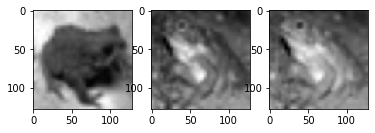

In [21]:
# plot 3 images as gray scale
plt.subplot(131)
plt.imshow(X[0,:,:,0], cmap=plt.get_cmap('gray'))
plt.subplot(132)
plt.imshow(X[1,:,:,0], cmap=plt.get_cmap('gray'))
plt.subplot(133)
plt.imshow(X[1,:,:,1], cmap=plt.get_cmap('gray')) #CIFAR data contains 3 channels, here we display 2nd channel for 1st image
# show the plot
plt.show()

In [0]:
fn_X = "X.pickle"
fn_Y = "Y.pickle"

pickle_out = open(root+dir_path+fn_X,"wb") # wrapping up images # You have to replace the directory of you images instead of "PathToSaveTheFile".
                                                        # For example "/content/gdrive/My Drive/MyFolder/X.pickle"
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open(root+dir_path+fn_Y,"wb") # wrapping up labels # You have to replace the directory of you images instead of "PathToSaveTheFile".
                                                        # For example "/content/gdrive/My Drive/MyFolder/y.pickle"
pickle.dump(y, pickle_out)
pickle_out.close()